<a href="https://colab.research.google.com/github/agusputrawan/Data-Analysis-ECommerce-Public/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Putu Agus Putrawan
- **Email:** agusputrawan.data@gmail.com
- **ID Dicoding:** putu_agus_putrawan_mDb9

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi lokasi pelanggan dan penjual berdasarkan kota dan negara bagian?

- Berapa rata-rata waktu pengiriman dari tanggal pesanan dibuat hingga diterima pelanggan?

- Bagaimana pengaruh ulasan terhadap penjualan?

- Produk kategori apa yang paling banyak menyumbang penjualan, dan berapa total pendapatan dari produk tersebut?

- Dari 10 produk dengan pendapatan tertinggi, metode pembayaran apa yang paling sering digunakan, dan bagaimana distribusinya pada masing-masing produk?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
products_translation = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/product_category_name_translation.csv")
products_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
sellers_df = pd.read_csv("https://media.githubusercontent.com/media/agusputrawan/Data-Analysis-ECommerce-Public/refs/heads/main/data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight dari Dataset:**

- customers_df: Memberikan data lokasi pelanggan, penting untuk memahami basis pelanggan berdasarkan kota dan kode pos.

- geolocation_df: Memberikan koordinat lokasi yang dapat digunakan untuk visualisasi peta distribusi pelanggan dan penjual.

- order_items_df: Berisi detail item dalam pesanan, memungkinkan analisis harga, volume penjualan, dan nilai pengiriman.

- order_payments_df: Data tentang metode pembayaran yang dapat memberikan insight terhadap preferensi metode pembayaran pelanggan.

- order_reviews_df: Ulasan dan skor pelanggan, berguna untuk analisis kepuasan pelanggan.

- orders_df: Informasi siklus pesanan dari pembuatan hingga pengiriman, bermanfaat untuk analisis waktu proses dan efektivitas pengiriman.

- products_df & products_translation: Berisi data produk dan terjemahannya, dapat digunakan untuk analisis kategori produk dan volume penjualan.

- sellers_df: Informasi lokasi penjual, membantu analisis distribusi penjual dan jarak dengan pelanggan.


### Assessing Data

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
customers_df.duplicated().sum()

0

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [17]:
geolocation_df.duplicated().sum()

261831

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [20]:
order_items_df.duplicated().sum()

0

In [21]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [23]:
order_payments_df.duplicated().sum()

0

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [26]:
order_reviews_df.duplicated().sum()

0

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [29]:
orders_df.duplicated().sum()

0

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [31]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [32]:
products_df.duplicated().sum()

0

In [33]:
products_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [34]:
products_translation.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [35]:
products_translation.duplicated().sum()

0

In [36]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [38]:
sellers_df.duplicated().sum()

0

**Insight**

- customers_df: Dataset ini bersih.

- geolocation_df: 261831 jumlah duplikasi. **Menghapus baris duplikat.**

- order_items_df: Dataset bersih. **Konversi kolom shipping_limit_date ke tipe datetime.**

- order_payments_df: Dataset ini bersih.

- order_reviews_df: Banyak nilai null di kolom review_comment_title dan review_comment_message. (Kolom ini opsional untuk analisis ulasan) M**engisi nilai null di kolom review_comment_title dan review_comment_message dengan string kosong.**

- orders_df: Kolom seperti order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki nilai null. **Konversi semua kolom waktu ke tipe datetime.** **Hapus baris dengan status selain delivered.**

- products_df: Ada nilai null di kolom product_category_name dan beberapa atribut produk. ** Isi nilai null di atribut produk (seperti product_weight_g) dengan rata-rata. Gabungkan dengan products_translation untuk mendapatkan nama kategori dalam bahasa Inggris.**

- sellers_df: Bersih

### Cleaning Data

In [39]:
geolocation_df.drop_duplicates(inplace=True)

In [40]:
geolocation_df.duplicated().sum()

0

In [41]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [42]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [43]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna("")
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna("")

In [44]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [45]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df = orders_df[orders_df['order_status'] == 'delivered']

In [46]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [47]:
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df = products_df.merge(products_translation, on='product_category_name', how='left')

<ipython-input-47-cb1789724599>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)


In [48]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [49]:
products_df = products_df[
    ['product_id',
     'product_category_name',
     'product_category_name_english',
     'product_name_lenght',
     'product_description_lenght',
     'product_photos_qty',
     'product_weight_g',
     'product_length_cm',
     'product_height_cm',
     'product_width_cm']
]
products_df.head()


,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [50]:
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [51]:
merge1 = pd.merge(
    left=customer_orders_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [52]:
merge2 = pd.merge(
    left=merge1,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [53]:
merge3 = pd.merge(
    left=merge2,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [54]:
merge4 = pd.merge(
    left=merge3,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
merge4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [55]:
all_df = pd.merge(
    left=merge4,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,,,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,,,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,,,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,,,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [56]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118686 entries, 0 to 118685
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118686 non-null  object        
 1   customer_unique_id             118686 non-null  object        
 2   customer_zip_code_prefix       118686 non-null  int64         
 3   customer_city                  118686 non-null  object        
 4   customer_state                 118686 non-null  object        
 5   order_id                       115723 non-null  object        
 6   order_status                   115723 non-null  object        
 7   order_purchase_timestamp       115723 non-null  datetime64[ns]
 8   order_approved_at              115708 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115721 non-null  datetime64[ns]
 10  order_delivered_customer_date  115715 non-null  datetime64[ns]
 11  

In [57]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,...,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score
count,118686.000000,115723,115708,115721,115715,115723,115720.000000,115720.000000,115720.000000,115723.000000,...,115723.00000,114085.000000,114085.000000,114085.000000,115723.000000,115703.000000,115703.000000,115703.000000,115723.00000,114862.000000
mean,35031.771532,2017-12-31 09:55:44.254227968,2017-12-31 21:21:18.761848832,2018-01-03 16:51:13.936606208,2018-01-12 21:28:02.115793152,2018-01-24 06:03:00.866379264,1.091272,2.940572,171.810794,1.197048,...,19.98140,48.802673,784.854871,2.206408,2105.689824,30.239173,16.579881,23.065046,24454.55110,4.080488
min,1003.000000,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,0.000000,0.000000,1.000000,...,0.00000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.00000,1.000000
25%,11250.000000,2017-09-12 18:16:08,2017-09-13 03:36:11.750000128,2017-09-14 22:57:45,2017-09-22 22:27:34.500000,2017-10-04 00:00:00,1.000000,1.000000,60.850000,1.000000,...,13.08000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.00000,4.000000
50%,24240.000000,2018-01-18 21:40:03,2018-01-19 10:55:43,2018-01-23 17:36:51,2018-02-01 11:07:13,2018-02-15 00:00:00,1.000000,2.000000,108.110000,1.000000,...,16.28000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.00000,5.000000
75%,58433.000000,2018-05-04 10:29:14,2018-05-04 17:10:04,2018-05-07 16:31:00,2018-05-15 00:17:16.500000,2018-05-25 00:00:00,1.000000,4.000000,188.940000,1.000000,...,21.16000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27930.00000,5.000000
max,99990.000000,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,26.000000,24.000000,13664.080000,21.000000,...,409.68000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.00000,5.000000
std,29819.659532,NaN,NaN,NaN,NaN,NaN,0.686737,2.776111,265.642619,0.701221,...,15.71829,10.016562,650.542538,1.717949,3772.255388,16.126537,13.419841,11.732093,27587.60226,1.347659


**Insight:**
- Geolocation: Duplikat dihapus, sekarang hanya menyimpan data lokasi unik.

- Order Items: Kolom tanggal diformat ulang, siap untuk analisis waktu pengiriman.

- Order Reviews: Kolom ulasan kosong tetap dipertahankan untuk melihat pola data ulasan.

- Orders: Data yang hilang pada kolom tanggal pengiriman dan persetujuan diperhatikan, bisa berdampak pada analisis pengiriman.

- Products: Data kategori produk yang hilang (null) dianalisis lebih lanjut.

- Sellers: Data sudah bersih tanpa null atau duplikat, siap untuk analisis lokasi penjual.

## Exploratory Data Analysis (EDA)

### Explore ...

In [58]:
all_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,118686,118686,118686.000000,118686,118686,115723,115723,115723,115708,115721,...,115703.000000,115723.00000,115723,115723,114862,114862.000000,114862,114862,114862,114862
unique,99441,96096,NaN,4119,27,96478,1,NaN,NaN,NaN,...,NaN,NaN,595,22,95647,NaN,4366,34440,627,95493
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,NaN,...,NaN,NaN,sao paulo,SP,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,,,2017-12-19 00:00:00,2017-08-17 22:17:55
freq,63,75,NaN,18794,50061,63,115723,NaN,NaN,NaN,...,NaN,NaN,28648,82566,63,NaN,101278,66767,534,63
mean,NaN,NaN,35031.771532,NaN,NaN,NaN,NaN,2017-12-31 09:55:44.254227968,2017-12-31 21:21:18.761848832,2018-01-03 16:51:13.936606208,...,23.065046,24454.55110,NaN,NaN,NaN,4.080488,NaN,NaN,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,...,6.000000,1001.00000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,11250.000000,NaN,NaN,NaN,NaN,2017-09-12 18:16:08,2017-09-13 03:36:11.750000128,2017-09-14 22:57:45,...,15.000000,6429.00000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,24240.000000,NaN,NaN,NaN,NaN,2018-01-18 21:40:03,2018-01-19 10:55:43,2018-01-23 17:36:51,...,20.000000,13660.00000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,58433.000000,NaN,NaN,NaN,NaN,2018-05-04 10:29:14,2018-05-04 17:10:04,2018-05-07 16:31:00,...,30.000000,27930.00000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,...,118.000000,99730.00000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [79]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118686 entries, 0 to 118685
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118686 non-null  object        
 1   customer_unique_id             118686 non-null  object        
 2   customer_zip_code_prefix       118686 non-null  int64         
 3   customer_city                  118686 non-null  object        
 4   customer_state                 118686 non-null  object        
 5   order_id                       115723 non-null  object        
 6   order_status                   115723 non-null  object        
 7   order_purchase_timestamp       115723 non-null  datetime64[ns]
 8   order_approved_at              115708 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115721 non-null  datetime64[ns]
 10  order_delivered_customer_date  115715 non-null  datetime64[ns]
 11  

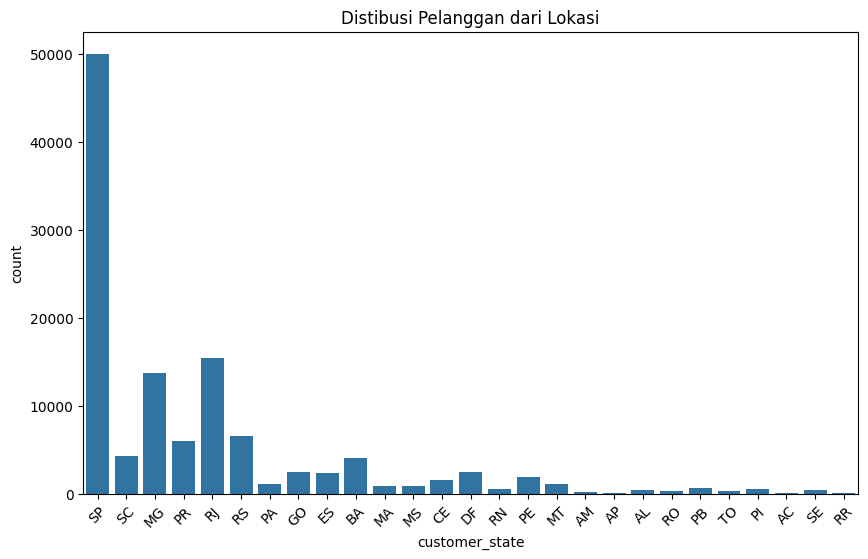

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_state', data=all_df)
plt.title('Distibusi Pelanggan dari Lokasi')
plt.xticks(rotation=45)
plt.show()

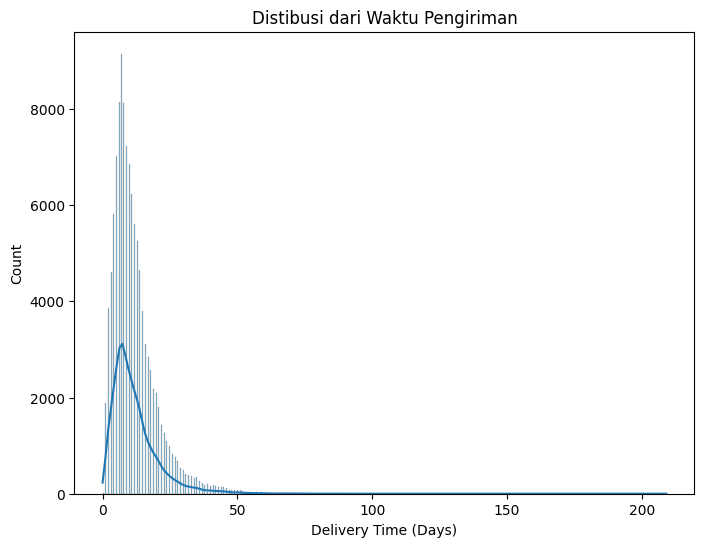

In [60]:
all_df['delivery_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days
plt.figure(figsize=(8, 6))
sns.histplot(all_df['delivery_time'], kde=True)
plt.title('Distibusi dari Waktu Pengiriman')
plt.xlabel('Delivery Time (Days)')
plt.show()

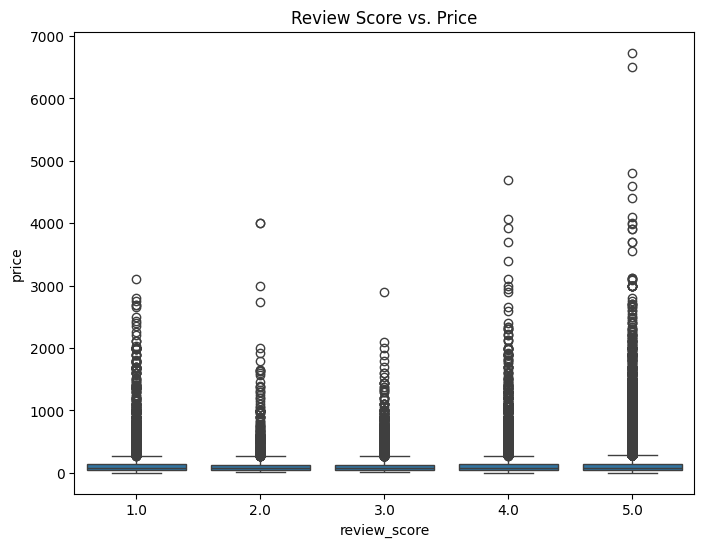

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='review_score', y='price', data=all_df)
plt.title('Review Score vs. Price')
plt.show()

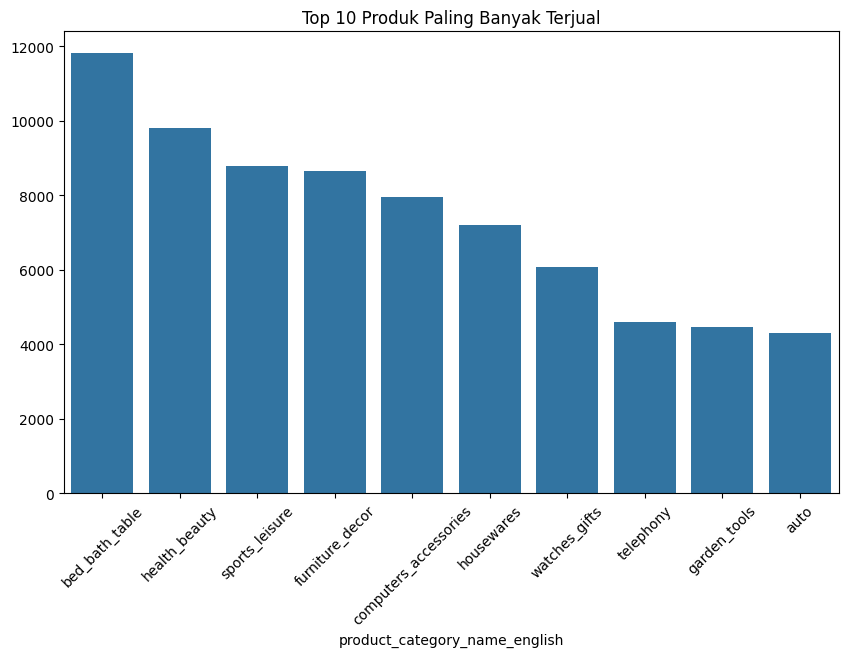

In [62]:
top_categories = all_df['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Produk Paling Banyak Terjual')
plt.xticks(rotation=45)
plt.show()

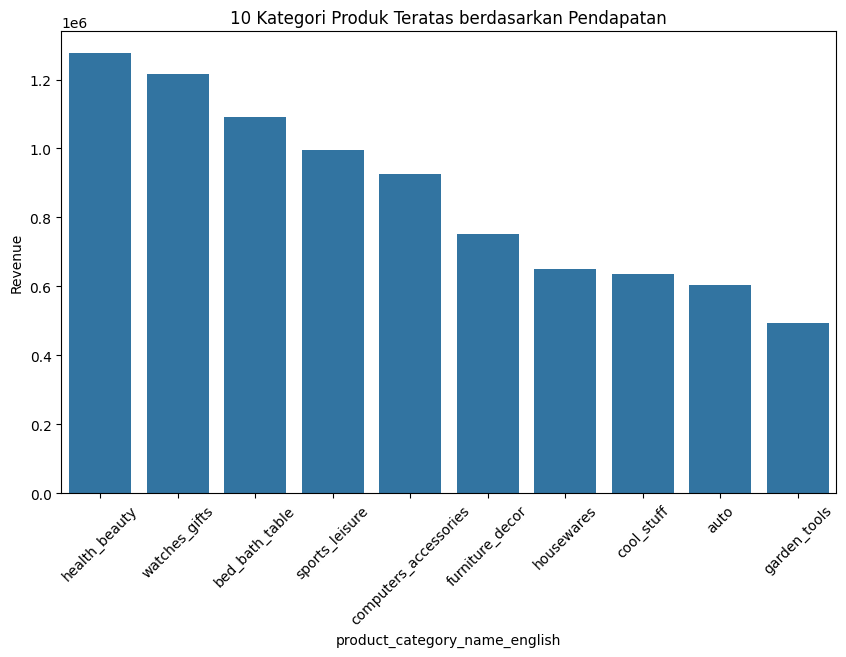

In [63]:
category_revenue = all_df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('10 Kategori Produk Teratas berdasarkan Pendapatan')
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()

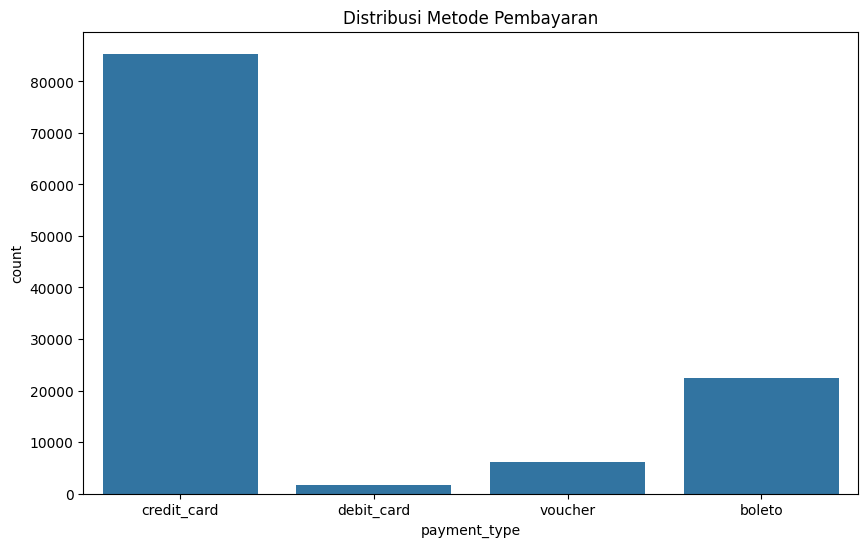

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=all_df)
plt.title('Distribusi Metode Pembayaran')
plt.show()

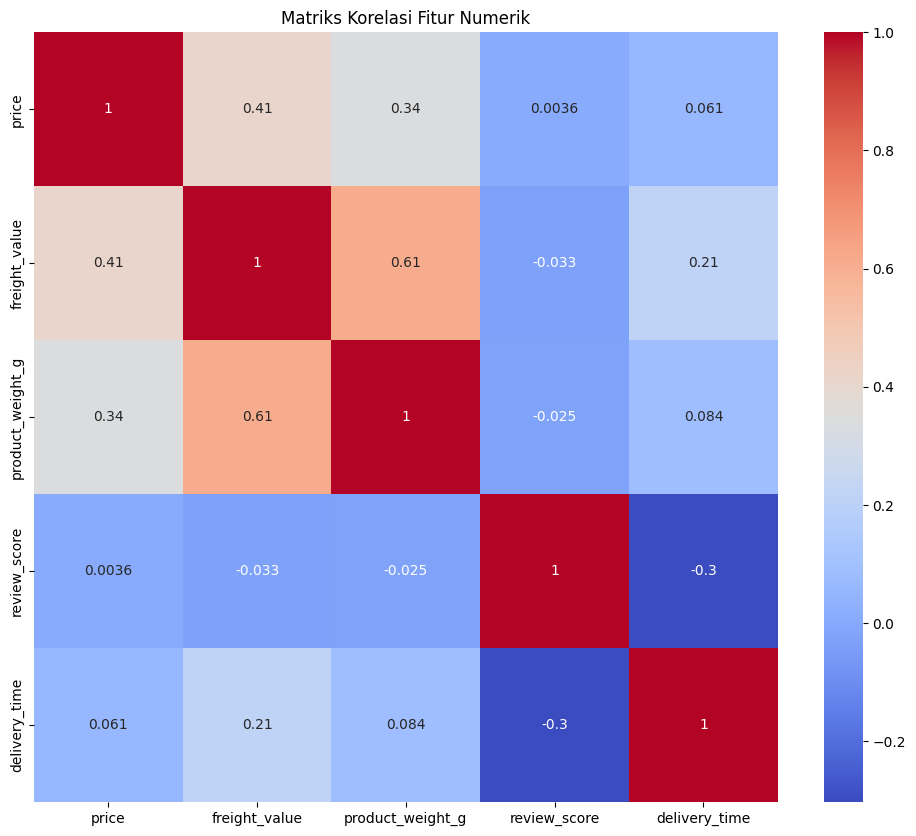

In [65]:
plt.figure(figsize=(12, 10))
correlation_matrix = all_df[['price', 'freight_value', 'product_weight_g', 'review_score', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

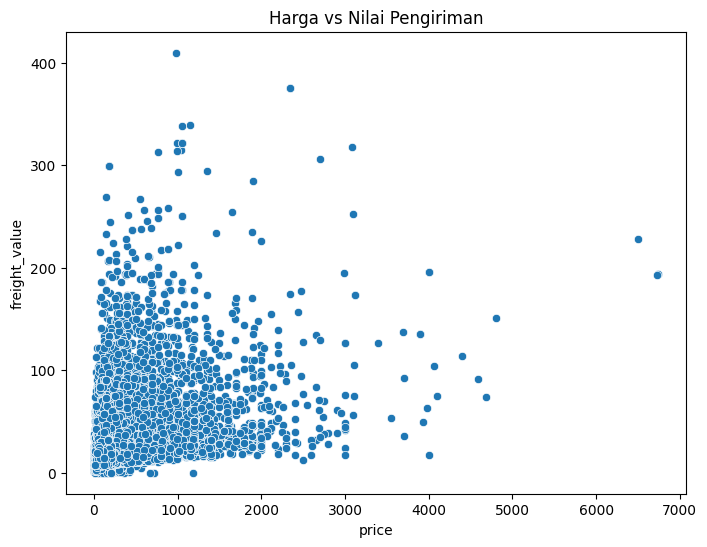

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='freight_value', data=all_df)
plt.title('Harga vs Nilai Pengiriman')
plt.show()

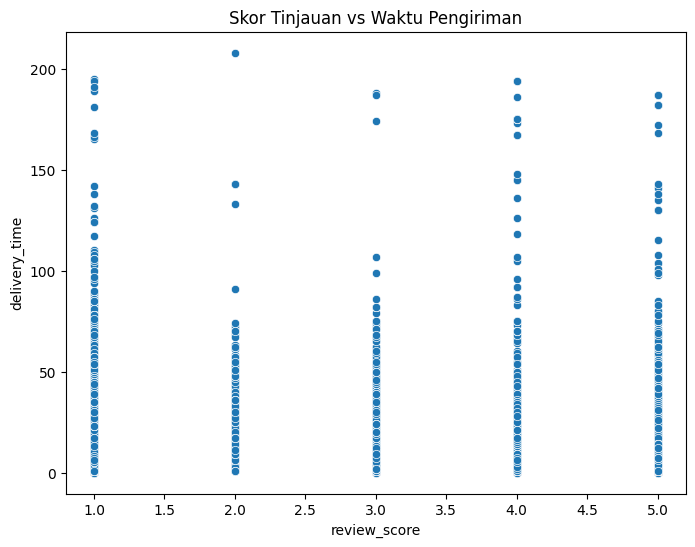

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_score', y='delivery_time', data=all_df)
plt.title('Skor Tinjauan vs Waktu Pengiriman')
plt.show()

In [68]:
from google.colab import files
all_df.to_csv('all_df.csv')
files.download('all_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**

1. Urutan tempat tinggal pelanggan terbanyak mencakup:

- SP: São Paulo
- RJ: Rio de Janeiro
- MG: Minas Gerais
- RS: Rio Grande do Sul
- PR: Paraná

(Kode negara bagian ini menunjukkan konsentrasi pelanggan terbesar di Brasil.)

2. Rata-rata waktu pengiriman adalah 12 hari.

3. Review score tidak memiliki hubungan signifikan dengan harga produk.

4. 10 produk dengan jumlah penjualan tertinggi mencakup kategori seperti: Bed Bath Table hingga Auto.

5. 10 produk dengan kontribusi pendapatan terbesar berasal dari kategori seperti: Health Beauty hingga Garden Tools.

6. Korelasi antara variabel:
- Freight Value dan Product Weight memiliki hubungan yang kuat.
- Product Weight dan Price juga menunjukkan korelasi yang cukup kuat dibandingkan variabel lainnya.
- Semakin kecil Freight Value, maka Price cenderung ikut menurun.

7. Faktor antara Delivery Time dan Review Score tidak menunjukkan relevansi atau hubungan yang signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi lokasi pelanggan dan penjual berdasarkan kota dan negara bagian?

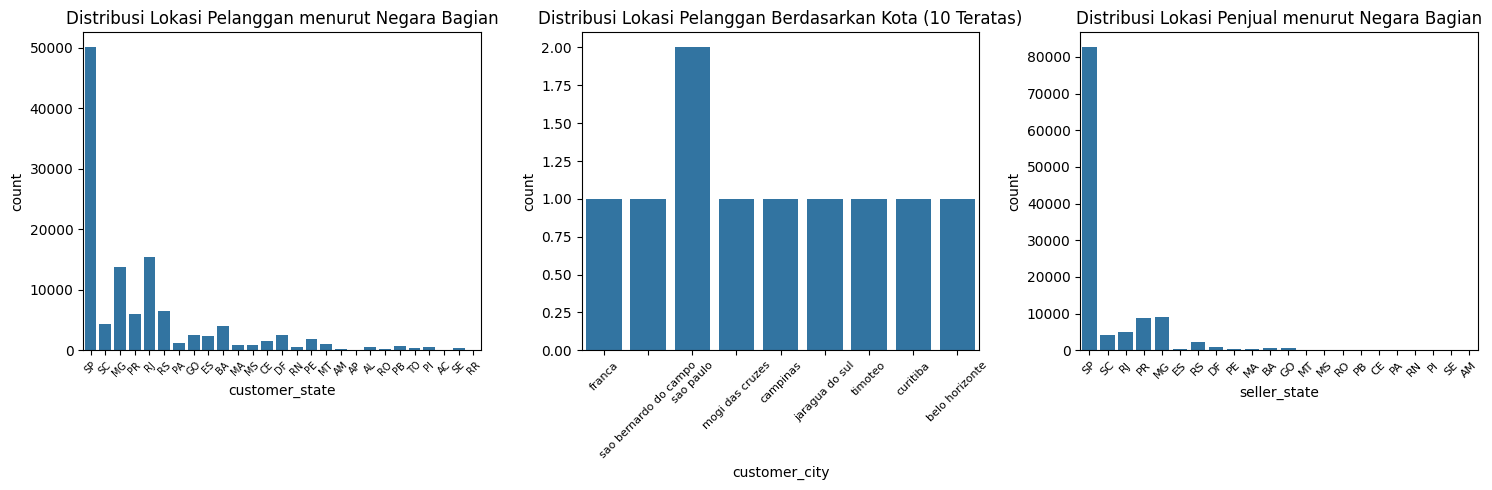

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Customer distribution by state
sns.countplot(x='customer_state', data=all_df, ax=axes[0])
axes[0].set_title('Distribusi Lokasi Pelanggan menurut Negara Bagian')
axes[0].tick_params(axis='x', rotation=45, labelsize=7)

# Customer distribution by city (Top 10)
sns.countplot(x='customer_city', data=all_df.head(10), ax=axes[1])
axes[1].set_title('Distribusi Lokasi Pelanggan Berdasarkan Kota (10 Teratas)')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

# Seller distribution by state
sns.countplot(x='seller_state', data=all_df, ax=axes[2])
axes[2].set_title('Distribusi Lokasi Penjual menurut Negara Bagian')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)


plt.tight_layout()
plt.show()


### Pertanyaan 2: Berapa rata-rata waktu pengiriman dari tanggal pesanan dibuat hingga diterima pelanggan?

Mean delivery time: 12.02 days


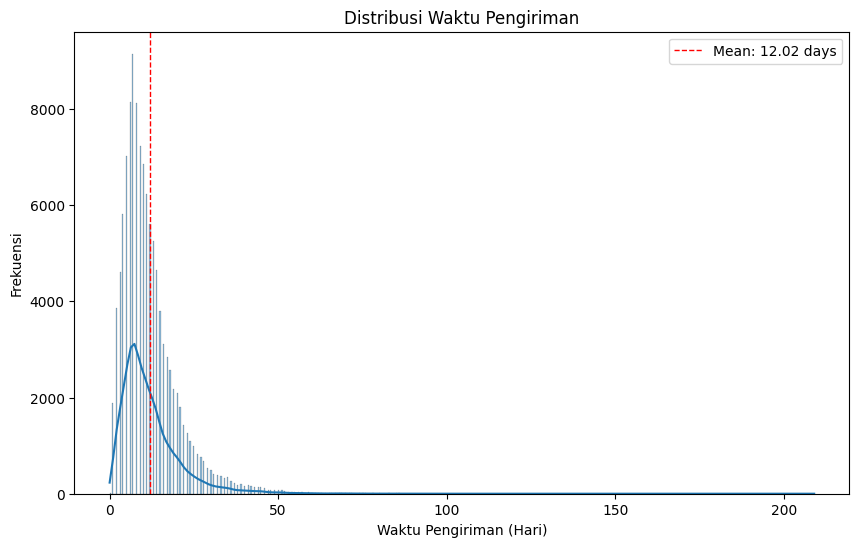

In [70]:
# Calculate the mean delivery time
mean_delivery_time = all_df['delivery_time'].mean()
print(f"Mean delivery time: {mean_delivery_time:.2f} days")

# Create a histogram of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(all_df['delivery_time'], kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Frekuensi')
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_delivery_time:.2f} days')
plt.legend()
plt.show()

###  Pertanyaan 3: Bagaimana pengaruh ulasan terhadap penjualan?

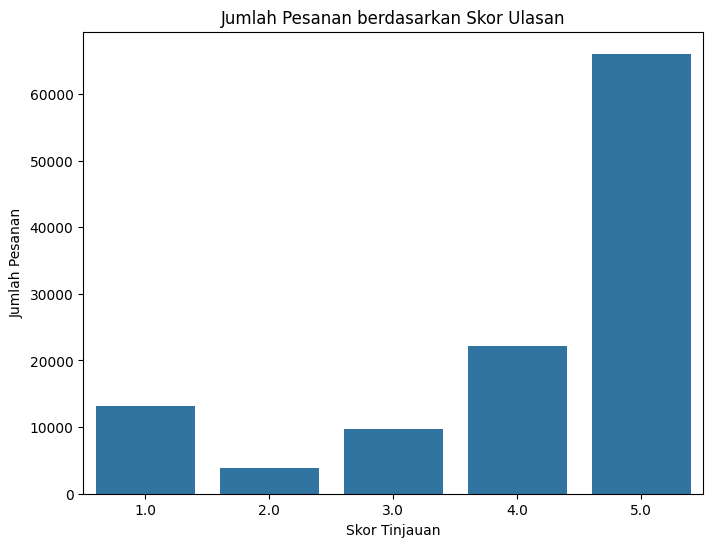

In [71]:
review_orders = all_df.groupby('review_score')['order_id'].count()

plt.figure(figsize=(8, 6))
sns.barplot(x=review_orders.index, y=review_orders.values)
plt.title('Jumlah Pesanan berdasarkan Skor Ulasan')
plt.xlabel('Skor Tinjauan')
plt.ylabel('Jumlah Pesanan')
plt.show()


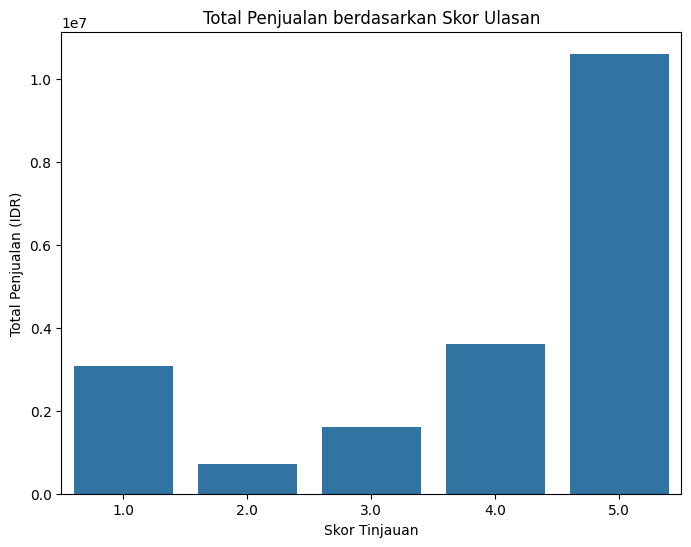

In [72]:
review_sales = all_df.groupby('review_score')['payment_value'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=review_sales.index, y=review_sales.values)
plt.title('Total Penjualan berdasarkan Skor Ulasan')
plt.xlabel('Skor Tinjauan')
plt.ylabel('Total Penjualan (IDR)')
plt.show()


In [73]:
correlation = all_df['review_score'].corr(all_df['payment_value'])
print(f"Korelasi antara skor ulasan dan total pembayaran: {correlation:.2f}")


Korelasi antara skor ulasan dan total pembayaran: -0.08


### Pertanyaan 4: Produk kategori apa yang paling banyak menyumbang penjualan, dan berapa total pendapatan dari produk tersebut?

Kategori produk dengan pendapatan tertinggi adalah 'health_beauty' dengan total pendapatan $1275776.49


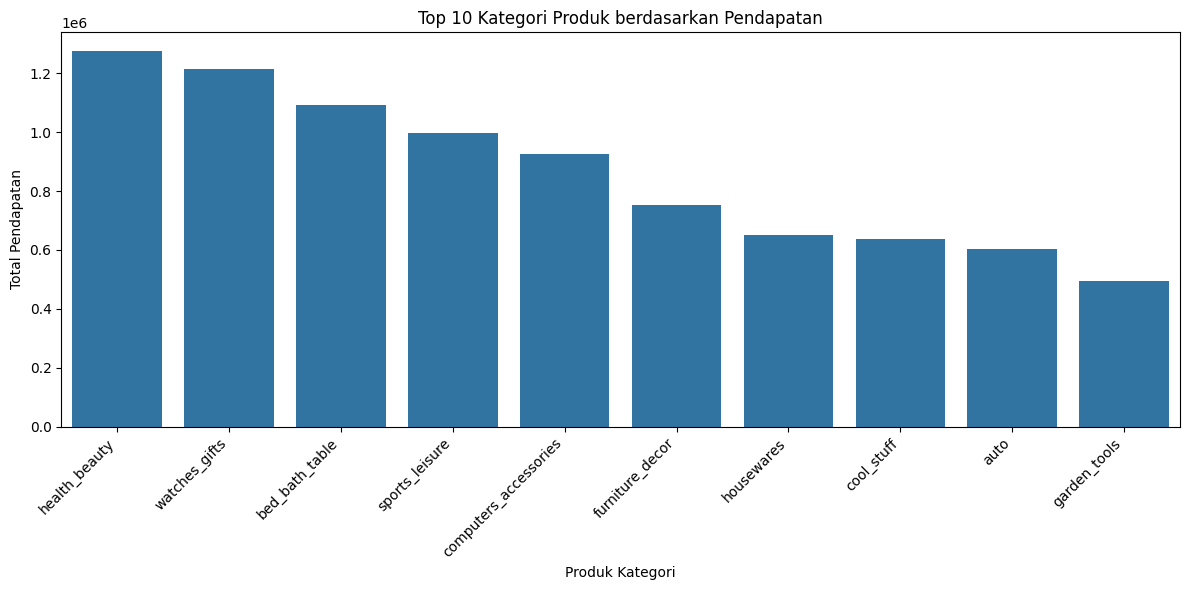

In [74]:
category_revenue = all_df.groupby('product_category_name_english')['price'].sum()

# Find the product category with the highest revenue
top_category = category_revenue.idxmax()
top_category_revenue = category_revenue.max()

# Print the results
print(f"Kategori produk dengan pendapatan tertinggi adalah '{top_category}' dengan total pendapatan ${top_category_revenue:.2f}")

# Create a bar plot of the top 10 product categories by revenue
top_10_categories = category_revenue.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.title('Top 10 Kategori Produk berdasarkan Pendapatan')
plt.xlabel('Produk Kategori')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pertanyaan 5: Dari 10 produk dengan pendapatan tertinggi, metode pembayaran apa yang paling sering digunakan, dan bagaimana distribusinya pada masing-masing produk?

payment_type                   boleto  credit_card  debit_card  voucher
product_category_name_english                                          
auto                              828         3215          69      190
bed_bath_table                   1886         8941         141      846
computers_accessories            2113         5362         148      340
cool_stuff                        724         2919          37      238
furniture_decor                  1721         6298         102      522
garden_tools                     1009         3167          68      236
health_beauty                    1829         7457         154      373
housewares                       1291         5302         112      491
sports_leisure                   1760         6499         124      408
watches_gifts                    1007         4758          61      251


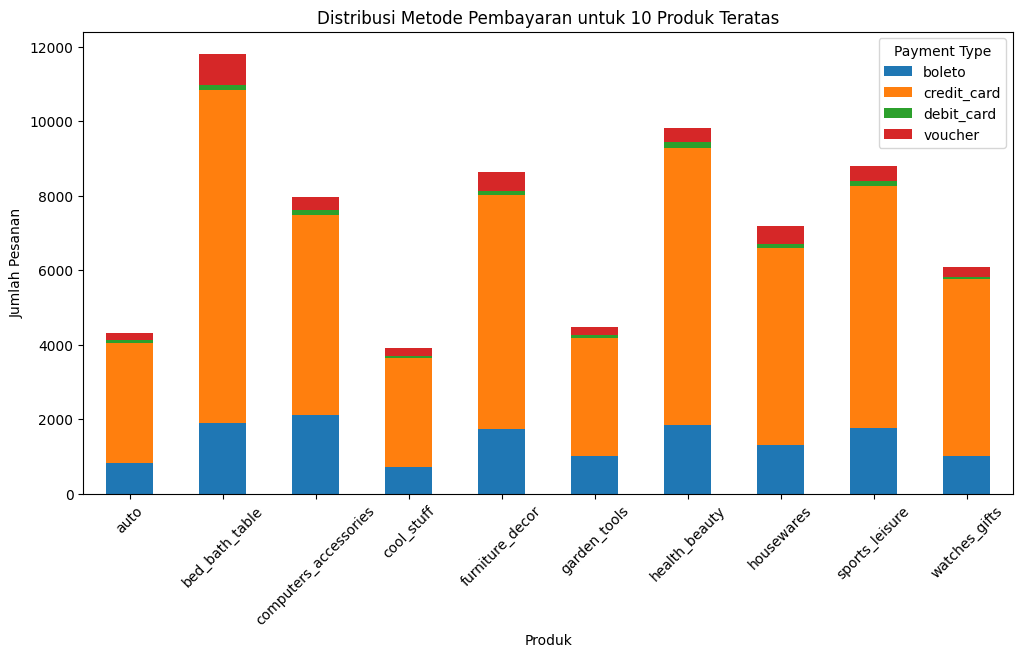

In [75]:
all_df['total_revenue'] = all_df['price'] * all_df['order_item_id']
top_10_products = all_df.groupby('product_category_name_english')['total_revenue'].sum().sort_values(ascending=False).head(10).index

# Filter dataframe for the top 10 products
top_products_df = all_df[all_df['product_category_name_english'].isin(top_10_products)]

# Analyze payment methods for the top 10 products
payment_method_distribution = top_products_df.groupby(['product_category_name_english', 'payment_type'])['order_id'].count().unstack(fill_value=0)

# Display the distribution
print(payment_method_distribution)

# Visualization (optional)
payment_method_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribusi Metode Pembayaran untuk 10 Produk Teratas')
plt.xlabel('Produk')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.legend(title='Payment Type')
plt.show()

**Insight:**

1. Pertanyaan 1: Distribusi lokasi pelanggan dan penjual berdasarkan kota dan negara, yakni:
- São Paulo (SP) mendominasi baik dalam jumlah pelanggan maupun penjual.
- Sebagian besar aktivitas e-commerce terjadi di wilayah-wilayah dengan populasi besar seperti São Paulo, Minas Gerais, Paraná, dan Rio de Janeiro.
- Sebaran pelanggan lebih luas dibandingkan dengan penjual, yang lebih terkonsentrasi di beberapa negara bagian tertentu.


2. Pertanyaan 2: Rata - rata waktu pengiriman dari tanggal pesanan dibuat hingga diterima pelanggan adalah 12 hari

3. Pertanyaan 3: Pengaruh ulasan terhadap penjualan adalah, semakin tinggi skor ulasan maka semakin tinggi pula tingkat penjualan yang diterima

4. Pertanyaan 4:Produk yang paling banyak menyumbang pendapatan adalah tipe health and beauty dengan penjualan sebesar $1275776.49

5. Pertanyaan 5: Metode pemabayaran yang paling sering digunakan di dalam produk yang menyumbang pendapatan terbanyak ialah Kartu Kredit dan Boleto(Wessel/Invoice)

## Analisis RFM (Recency, Frequency, Monetary)

In [76]:
rfm_df = all_df[['customer_id', 'order_purchase_timestamp', 'order_id', 'price']].copy()


rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])


now = rfm_df['order_purchase_timestamp'].max()
rfm_df['recency'] = (now - rfm_df['order_purchase_timestamp']).dt.days


rfm_df['frequency'] = rfm_df.groupby('customer_id')['order_id'].transform('count')


rfm_df['monetary'] = rfm_df.groupby('customer_id')['price'].transform('sum')


rfm_analysis = rfm_df.groupby('customer_id').agg({
    'recency': 'min',
    'frequency': 'max',
    'monetary': 'max'
})

# Display the RFM analysis
print(rfm_analysis.head())


quantiles = rfm_analysis.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# rfm_analysis['r_quartile'] = rfm_analysis['recency'].apply(RScore, args=('recency',quantiles,))
# rfm_analysis['f_quartile'] = rfm_analysis['frequency'].apply(FMScore, args=('frequency',quantiles,))
# rfm_analysis['m_quartile'] = rfm_analysis['monetary'].apply(FMScore, args=('monetary',quantiles,))
# rfm_analysis['rfm_segment'] = rfm_analysis.r_quartile.map(str) + rfm_analysis.f_quartile.map(str) + rfm_analysis.m_quartile.map(str)
# rfm_analysis['rfm_score'] = rfm_analysis[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

print(rfm_analysis.head())

                                  recency  frequency  monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703    287.0          1     89.80
000161a058600d5901f007fab4c27140    409.0          1     54.90
0001fd6190edaaf884bcaf3d49edf079    547.0          1    179.99
0002414f95344307404f0ace7a26f1d5    378.0          1    149.90
000379cdec625522490c315e70c7a9fb    149.0          1     93.00
                                  recency  frequency  monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703    287.0          1     89.80
000161a058600d5901f007fab4c27140    409.0          1     54.90
0001fd6190edaaf884bcaf3d49edf079    547.0          1    179.99
0002414f95344307404f0ace7a26f1d5    378.0          1    149.90
000379cdec625522490c315e70c7a9fb    149.0          1     93.00


In [77]:
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Visualisasi Distribusi RFM Segments
# sns.countplot(x='rfm_segment', data=rfm_analysis, ax=axes[0])
# axes[0].set_title('Distribution of RFM Segments')
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, size = 7)

# # Visualisasi Distribusi RFM Scores
# sns.countplot(x='rfm_score', data=rfm_analysis, ax=axes[1])
# axes[1].set_title('Distribution of RFM Scores')

# # Tampilkan plot
# plt.tight_layout()
# plt.show()


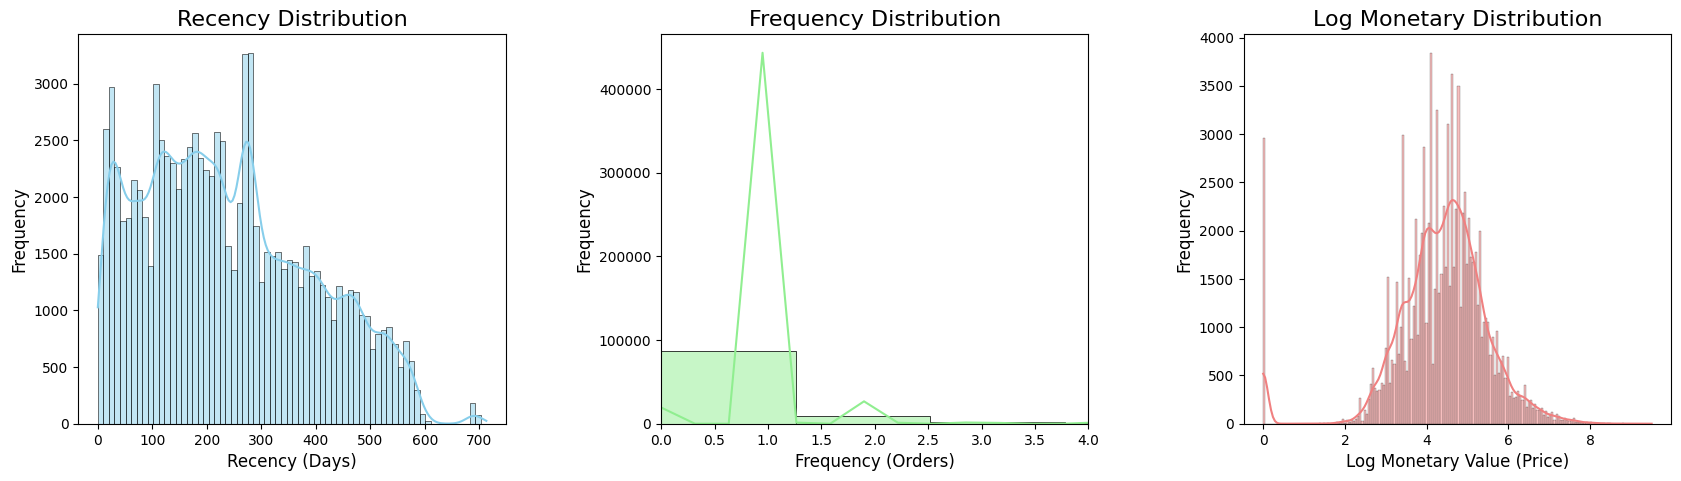

In [78]:
plt.figure(figsize=(18, 6))

# Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm_analysis['recency'], kde=True, color='skyblue')
plt.title('Recency Distribution', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm_analysis['frequency'], kde=True, color='lightgreen', bins=50)
plt.xlim(0, np.percentile(rfm_analysis['frequency'], 99))  # Memotong outlier
plt.title('Frequency Distribution', fontsize=16)
plt.xlabel('Frequency (Orders)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


# Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(np.log1p(rfm_analysis['monetary']), kde=True, color='lightcoral')
plt.title('Log Monetary Distribution', fontsize=16)
plt.xlabel('Log Monetary Value (Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout(pad=5)
plt.show()


**Insight:**

1. Recency Distribution (Seberapa Baru Pelanggan Bertransaksi?)
Distribusi miring ke kanan → Banyak pelanggan yang terakhir bertransaksi dalam 100-300 hari terakhir, tetapi ada juga yang sudah lama tidak bertransaksi (hingga 700 hari).

2. Frequency Distribution (Seberapa Sering Pelanggan Bertransaksi?)
Mayoritas pelanggan hanya bertransaksi 1 kali (peak di sekitar 1 order).
Ekor kanan yang sangat kecil → Hanya sedikit pelanggan yang melakukan beberapa kali transaksi.

3. Log Monetary Distribution (Seberapa Banyak Pelanggan Membelanjakan Uangnya?)
Setelah transformasi log, distribusi lebih mendekati normal.
Ada dua puncak (bimodal distribution) → Ini bisa menunjukkan adanya dua segmen pelanggan yang berbeda:
- Pelanggan dengan pengeluaran kecil hingga sedang.
- Pelanggan dengan pengeluaran besar (high-value customers).

## Conclusion

📊 **Gambaran Kesimpulan dan Strategi Bisnis dari Analisis E-commerce**  

### 1️⃣ Distribusi Lokasi Pelanggan & Penjual  
📍 São Paulo (SP) mendominasi jumlah pelanggan & penjual.  
🌎 Sebagian besar aktivitas terjadi di kota dengan populasi besar (São Paulo, Minas Gerais, Paraná, Rio de Janeiro).  
🔍 Pelanggan tersebar lebih luas dibanding penjual, yang lebih terpusat di wilayah tertentu.  

**🛠 Strategi:**  
✔️ Ekspansi pemasaran ke wilayah dengan pelanggan tinggi namun jumlah penjual rendah untuk meningkatkan penjualan.  

### 2️⃣ Rata-rata Waktu Pengiriman  
⏳ **12 hari** dari pemesanan hingga diterima pelanggan.  

**🛠 Strategi:**  
✔️ Optimalkan supply chain & logistik untuk mempercepat pengiriman.  
✔️ Sediakan opsi pengiriman ekspres untuk meningkatkan kepuasan pelanggan.  

### 3️⃣ Pengaruh Ulasan terhadap Penjualan  
⭐ Semakin tinggi skor ulasan, semakin tinggi tingkat penjualan.  

**🛠 Strategi:**  
✔️ Dorong ulasan positif melalui diskon atau reward bagi pelanggan yang memberikan review.  
✔️ Tingkatkan kualitas layanan dan produk untuk mempertahankan rating tinggi.  

### 4️⃣ Produk dengan Pendapatan Tertinggi  
🏆 Kategori **Health & Beauty** mendominasi dengan pendapatan **$1,275,776.49**  

**🛠 Strategi:**  
✔️ Fokus pemasaran & stok pada kategori ini untuk memaksimalkan revenue.  
✔️ Buat bundling produk Health & Beauty dengan diskon khusus untuk meningkatkan repeat purchase.  

### 5️⃣ Metode Pembayaran Favorit  
💳 **Kartu Kredit & Boleto (Invoice)** adalah metode pembayaran paling populer pada kategori produk dengan pendapatan terbesar.  

**🛠 Strategi:**  
✔️ Perbanyak promo cicilan & cashback untuk metode pembayaran ini.  
✔️ Pastikan sistem pembayaran aman & nyaman untuk meningkatkan konversi.  

---

## 🚀 **Strategi Bisnis Berdasarkan RFM Analysis**  
| **Aspek**      | **Insight** | **Strategi** |
|---------------|-----------|------------|
| **Recency** (Kapan terakhir belanja?) | Banyak pelanggan lama yang belum kembali berbelanja | Strategi reaktivasi pelanggan lama: Email promo, diskon eksklusif, program loyalitas |
| **Frequency** (Seberapa sering pelanggan belanja?) | Sebagian besar pelanggan hanya belanja 1 kali | Strategi retensi pelanggan: Program repeat purchase, promo khusus pelanggan baru |
| **Monetary** (Seberapa besar pengeluaran pelanggan?) | Ada dua segmen pelanggan (pembeli kecil vs pembeli besar) | Segmentasi & personalisasi promo sesuai nilai pelanggan |

---

## ✨ **Rekomendasi Bisnis untuk Pertumbuhan** 🚀  
✅ **Reaktivasi pelanggan lama** → Kirim email reminder & diskon eksklusif.  
✅ **Dorong pembelian berulang** → Gunakan promo spesial untuk pembelian kedua.  
✅ **Optimalkan kategori produk terlaris** → Fokus marketing & stok pada kategori Health & Beauty.  
✅ **Tingkatkan kecepatan pengiriman** → Sediakan opsi ekspres & optimalkan logistik.  
✅ **Gunakan metode pembayaran populer** → Dorong lebih banyak transaksi dengan promo khusus kartu kredit & invoice.  